In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [3]:
data = pd.read_csv(r"C:\Python_Labs\AI Bootcamp 2025\book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [10]:
data['clean_review'] = data['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [11]:
data.head()

,index,reviewText,rating,clean_review
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [12]:
#use vader to create a seperate sent_score column
analyzer = SentimentIntensityAnalyzer()
data['sent_score'] = data['clean_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [13]:
# Define the bins and labels
bins = [-1, -0.05, 0.05, 1]
labels = ['negative', 'neutral', 'positive']

# Create a new column 'sent_label' based on the 'sent_score'
data['sent_label'] = pd.cut(data['sent_score'], bins=bins, labels=labels)

# Display the first few rows to verify
data.head()

,index,reviewText,rating,clean_review,sent_score,sent_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='sent_label'>

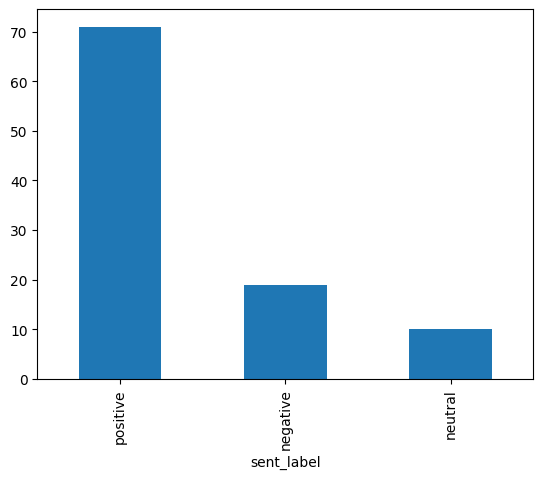

In [16]:
data['sent_label'].value_counts().plot.bar()